In [3]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

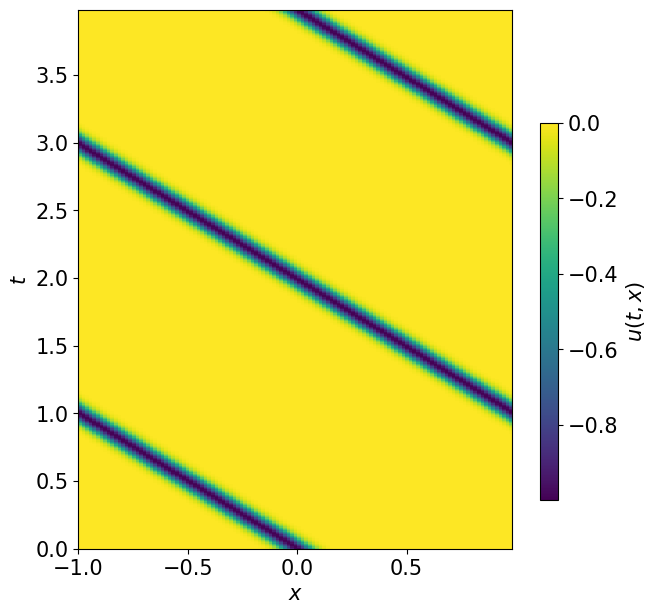

In [16]:
N = 121 # number of grid points in x
xlim = [-1, 1] # bound of x
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

dt = 4 / N**2 # stability criterion is a whole different subject...
tmax = 4      # the maximum time to integrate
datadump_freq = int(0.01 / dt) # intermediate data dump frequency
outer_loop_count = int(tmax/dt / datadump_freq)

uj = -1 * np.exp(-200 * xj**2)            # - u(  0, x)
uj_old = -1 * np.exp(-200 * (xj - dt)**2) # - u(-Dt, x)

# time and u data containers
t_data = [dt] * (1 + outer_loop_count)
u_data = [uj] * (1 + outer_loop_count)

for i in range(outer_loop_count):
    t_data[i] *= i * datadump_freq
    u_data[i]  = uj

    for _ in range(datadump_freq):
        Uj = fft.fft(uj)
        Wj = -kj**2 * Uj       # approximation for u_xx
        wj = fft.ifft(Wj).real # remove the imaginary part, which should all be zeros
        uj_old, uj = uj, 2*uj - uj_old + dt**2*wj

t_data[-1] *= i * datadump_freq
u_data[-1]  = uj


#plot
fig, ax = plt.subplots(figsize=(7, 7), ncols=1)

pos = ax.imshow(u_data, interpolation='none', origin='lower', cmap='viridis',
           extent=np.hstack(([xj[0], xj[-1]], [t_data[0], t_data[-1]])),
           aspect='auto')
fig.colorbar(pos, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7,
             label="$u(t, x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

plt.show()

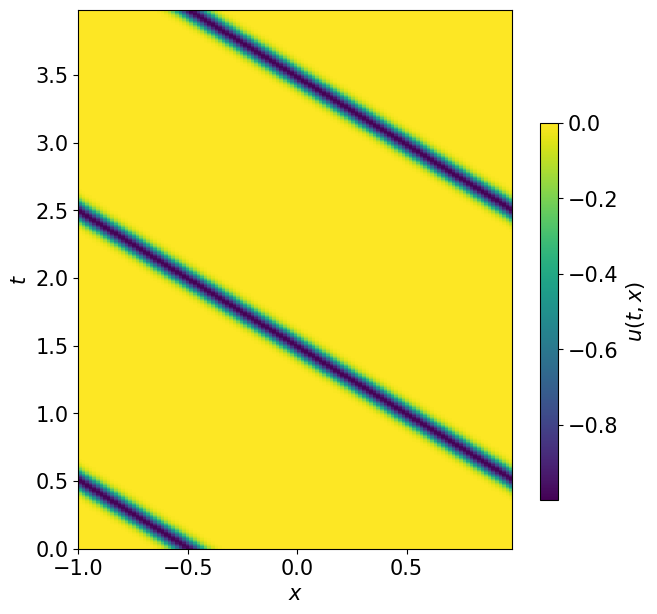

In [22]:
N = 121 # number of grid points in x
xlim = [-1, 1] # bound of x
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

dt = 4 / N**2 # stability criterion is a whole different subject...
tmax = 4      # the maximum time to integrate
datadump_freq = int(0.01 / dt) # intermediate data dump frequency
outer_loop_count = int(tmax/dt / datadump_freq)

uj = -1 * np.exp(-200 * (xj + 0.5)**2)            # - u(  0, x)
uj_old = -1 * np.exp(-200 * ((xj + 0.5) - dt)**2) # - u(-Dt, x)

# time and u data containers
t_data = [dt] * (1 + outer_loop_count)
u_data = [uj] * (1 + outer_loop_count)

for i in range(outer_loop_count):
    t_data[i] *= i * datadump_freq
    u_data[i]  = uj

    for _ in range(datadump_freq):
        Uj = fft.fft(uj)
        Wj = -kj**2 * Uj       # approximation for u_xx
        wj = fft.ifft(Wj).real # remove the imaginary part, which should all be zeros
        uj_old, uj = uj, 2*uj - uj_old + dt**2*wj

t_data[-1] *= i * datadump_freq
u_data[-1]  = uj


#plot
fig, ax = plt.subplots(figsize=(7, 7), ncols=1)

pos = ax.imshow(u_data, interpolation='none', origin='lower', cmap='viridis',
           extent=np.hstack(([xj[0], xj[-1]], [t_data[0], t_data[-1]])),
           aspect='auto')
fig.colorbar(pos, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7,
             label="$u(t, x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

plt.show()

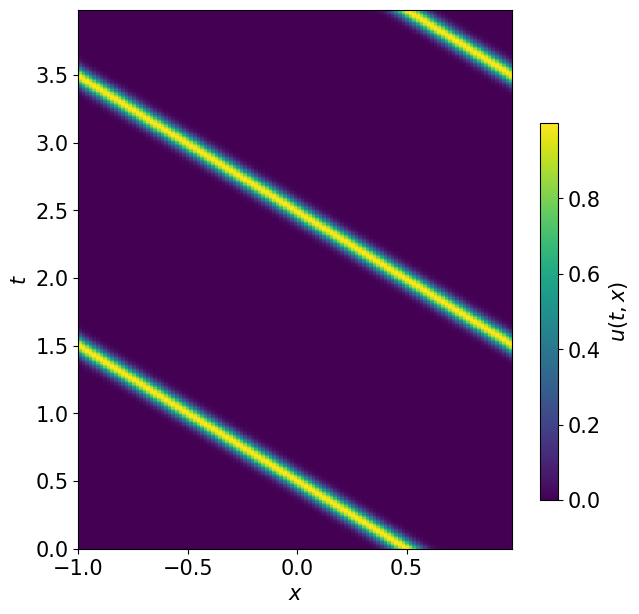

In [23]:
N = 121 # number of grid points in x
xlim = [-1, 1] # bound of x
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

dt = 4 / N**2 # stability criterion is a whole different subject...
tmax = 4      # the maximum time to integrate
datadump_freq = int(0.01 / dt) # intermediate data dump frequency
outer_loop_count = int(tmax/dt / datadump_freq)

uj = np.exp(-200 * (xj - 0.5)**2)            # - u(  0, x)
uj_old = np.exp(-200 * ((xj - 0.5) - dt)**2) # - u(-Dt, x)

# time and u data containers
t_data = [dt] * (1 + outer_loop_count)
u_data = [uj] * (1 + outer_loop_count)

for i in range(outer_loop_count):
    t_data[i] *= i * datadump_freq
    u_data[i]  = uj

    for _ in range(datadump_freq):
        Uj = fft.fft(uj)
        Wj = -kj**2 * Uj       # approximation for u_xx
        wj = fft.ifft(Wj).real # remove the imaginary part, which should all be zeros
        uj_old, uj = uj, 2*uj - uj_old + dt**2*wj

t_data[-1] *= i * datadump_freq
u_data[-1]  = uj


#plot
fig, ax = plt.subplots(figsize=(7, 7), ncols=1)

pos = ax.imshow(u_data, interpolation='none', origin='lower', cmap='viridis',
           extent=np.hstack(([xj[0], xj[-1]], [t_data[0], t_data[-1]])),
           aspect='auto')
fig.colorbar(pos, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7,
             label="$u(t, x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

plt.show()

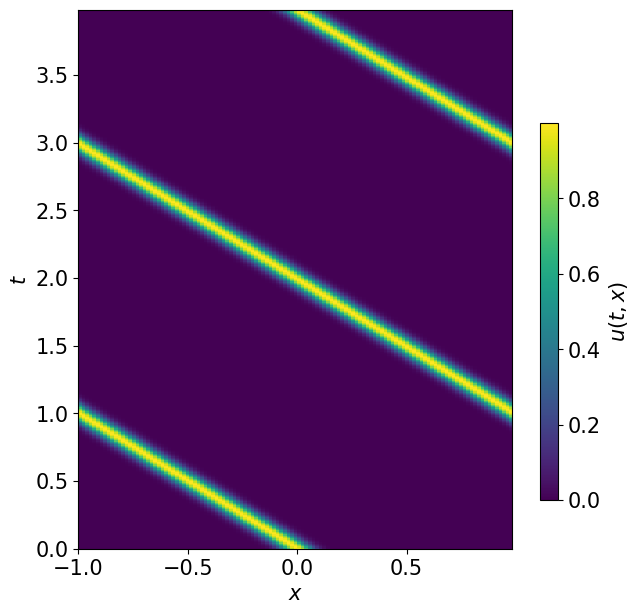

In [9]:
fig, ax = plt.subplots(figsize=(7, 7), ncols=1)

pos = ax.imshow(u_data, interpolation='none', origin='lower', cmap='viridis',
           extent=np.hstack(([xj[0], xj[-1]], [t_data[0], t_data[-1]])),
           aspect='auto')
fig.colorbar(pos, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7,
             label="$u(t, x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

plt.show()